In this notebook, we will apply two machine learning tools on a small dataset : K-Means (for classification) and PCA (for dimensionality reduction). The dataset contains the average temperatures of 15 french cities for every months of the year.  

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt

### Data Loading

In [2]:
npz = np.load('temper.npz')
npz.files

['villes', 'data', 'varname']

In [3]:
df= pd.DataFrame(npz["data"],npz["villes"],npz["varname"])

### Data Visualization

In [4]:
display(df)

,January,February,March,April,May,June,July,August,September,October,November,December,Latitude,Longitude
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.5,-0.34
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.2,-4.29
Clermont-Ferrand,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.5,3.05
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.1,5.43
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.4,3.04
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.5,4.51
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.2,5.24
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.4,3.53
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.1,-1.33
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.4,7.15


For a selection of 15 French cities, we have the average temperature of each city for all months of the year. We also have two additional pieces of information (Latitude and Longitude) giving the positions of each city.

In [5]:
villes = npz["villes"]
months = npz["varname"][:-2]
positions = npz["varname"][12:]
df_temperatures = df[months]
df_positions = df[positions]

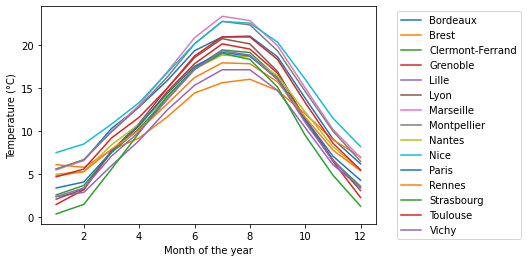

In [6]:
x=np.array(range(1,13))

for ville in df_temperatures.index:
    plt.plot(x, df_temperatures.loc[ville,:])

plt.xlabel("Month of the year")
plt.ylabel("Temperature (°C)")

plt.legend(villes,bbox_to_anchor=(1.05, 1.0), loc='upper left')

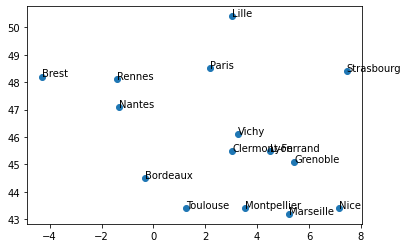

In [7]:
x=df_positions.loc[:,"Latitude"]
y=df_positions.loc[:,"Longitude"]

plt.scatter(y,x)

for i, ville in enumerate(villes):
    plt.annotate(ville, (y[i], x[i]))

### Classification with K-means
### K = 3

In [8]:
from sklearn.cluster import KMeans
clf = KMeans(3)

label_predictions = clf.fit_predict(df_temperatures)

color_map = {0: "blue", 1:"red", 2:"green"}

label_colors = np.vectorize(color_map.get)(label_predictions)

#### Visulization

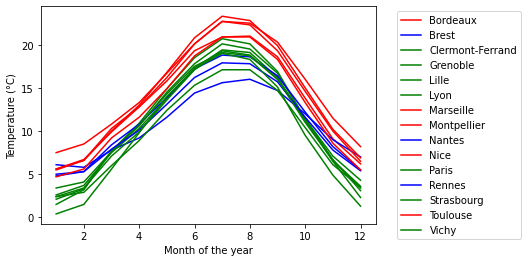

In [9]:
x=np.array(range(1,13))

for i, ville in enumerate(df_temperatures.index):
    plt.plot(x, df_temperatures.loc[ville,:],color=label_colors[i])

plt.xlabel("Month of the year")
plt.ylabel("Temperature (°C)")

plt.legend(villes,bbox_to_anchor=(1.05, 1.0), loc='upper left')

The K-Means algorithm allowed to classify french cities : we observe 3 groups on the above plot. We will try to interpret this classification :

First, there is a separation between cities with warmer temperatures (red) and cities with colder temperatures (green and blue). We can easily identify the red cluster as being the South of France: hot summers and a mild winter compared to the other clusters (Mediterranean climate)

Then we see that the blue cluster groups together the cities with temperatures which have a low thermal amplitude during the year (it is neither cold nor hot), one can think of the West of France (ocean temperatures).

Finally, in the green cluster we see that there is a significant difference between summer and winter temperatures: quite hot in summer and very cold in winter, this is notably reminiscent of the Parisian climate and the North of France for example (semi-continental temperatures)

Text(0.5, 1.0, 'Result of the classification on positions')

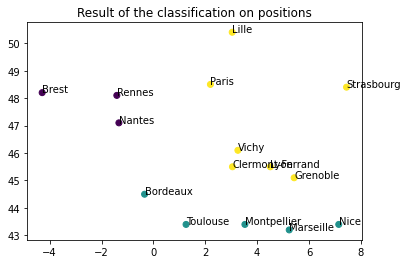

In [10]:
x=df_positions.loc[:,"Latitude"]
y=df_positions.loc[:,"Longitude"]

plt.scatter(y,x,c=label_predictions)

for i, ville in enumerate(villes):
    plt.annotate(ville, (y[i], x[i]))
    
plt.title("Result of the classification on positions")

We can see that there is a geographical similarity between the cities in each cluster. However, the dataset we used in the model did not contain the position features. 

It is logical to find this geographical similarity in each cluster, indeed the cities located in the same geographical area have the same type of climate. 

We notice that we could associate the 3 types of climate described earlier to the corresponding cluster : purple is oceanic climate, yellow is semi-continental climate and blue is Mediterranean climate

### K = 2

In [11]:
clf = KMeans(2)
label_predictions = clf.fit_predict(df_temperatures)

label_colors = np.vectorize(color_map.get)(label_predictions)

#### Visualization

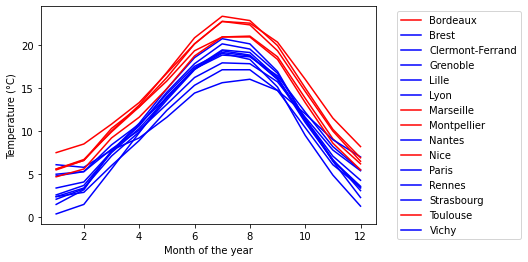

In [12]:
x=np.array(range(1,13))

for i, ville in enumerate(df_temperatures.index):
    plt.plot(x, df_temperatures.loc[ville,:],color=label_colors[i])

plt.xlabel("Month of the year")
plt.ylabel("Temperature (°C)")

plt.legend(villes,bbox_to_anchor=(1.05, 1.0), loc='upper left')

This time we notice a clear differentiation between the hottest temperatures (in red) and the coldest temperatures (in blue).

This in fact shows a separation between Mediterranean temperatures and other temperatures.

Text(0.5, 1.0, 'Result of the classification on positions')

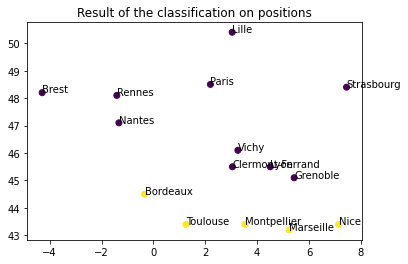

In [13]:
x=df_positions.loc[:,"Latitude"]
y=df_positions.loc[:,"Longitude"]

plt.scatter(y,x,c=label_predictions)

for i, ville in enumerate(villes):
    plt.annotate(ville, (y[i], x[i]))
    
plt.title("Result of the classification on positions")

From a geographical point of view, we notice that there is a separation between the cities of the southern other cities (North, West, East, Center).

This confirms the separation between Mediterranean temperatures and other temperatures.

### Dimensionality Reduction

Now, we will perform a dimensionality reduction (with the PCA) on our dataset. We would like to know if the main information remains after the PCA.

In [14]:
from sklearn.decomposition import PCA

clf = PCA(n_components=None)
Xp = clf.fit_transform(df_temperatures)
A=clf.explained_variance_ratio_

#### Proportion of energy in each principal direction

Text(0, 0.5, 'Energy')

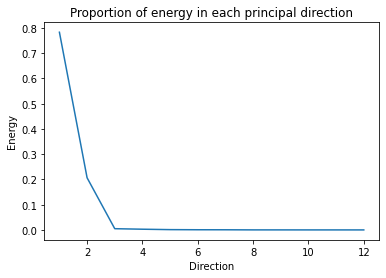

In [15]:
month=np.array(range(1,13))
plt.plot(month,A)
plt.title("Proportion of energy in each principal direction")
plt.xlabel("Direction")
plt.ylabel("Energy")

We notice that the more we advance in the directions, the less the proportion of energy of the corresponding direction is important. This proportion of energy even drops very close to 0 from the 3rd dimension. It is therefore relevant to choose p = 2 for our PCA. Indeed, almost all of the energy is stored in the first 2 directions.

#### Visualization of the projected dataset

Text(0, 0.5, 'direction 2')

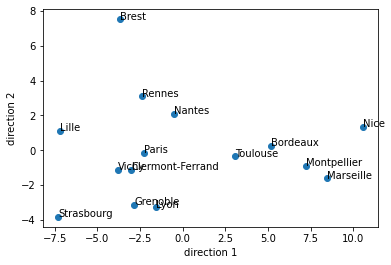

In [16]:
x=Xp[:,0:1]
y=Xp[:,1:2]

plt.scatter(x,y)
for i, ville in enumerate(villes):
    plt.annotate(ville, (x[i], y[i]))
plt.xlabel("direction 1")
plt.ylabel("direction 2")

It can be seen that information on geographical positions is preserved. There is a group of cities with the cities of the South (Toulouse, Bordeaux, Montpellier, Marseille, Nice) for absisses greater than 2.5. And there is also a group with the other cities for x-coordinates less than 2.5.

In addition, the cities of the West and the East stand out from the rest of the cities. Indeed, one observes Brest and Strasboug at the 2 ends of the y-axis.

#### K-means with the projected dataset

In [17]:
clf = KMeans(3)

label_predictions = clf.fit_predict(Xp)

label_colors = np.vectorize(color_map.get)(label_predictions)

Text(0, 0.5, 'direction 2')

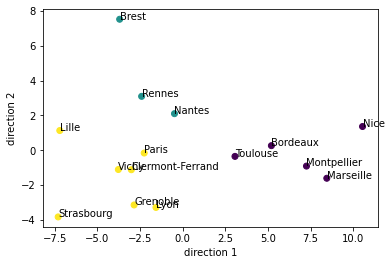

In [18]:
x=Xp[:,0:1]
y=Xp[:,1:2]

plt.scatter(x,y, c=label_predictions)
for i, ville in enumerate(villes):
    plt.annotate(ville, (x[i], y[i]))
plt.xlabel("direction 1")
plt.ylabel("direction 2")

We can notice that the clusters obtained are the same that the clusters we obtained with the initial dataset. It shows that the projected dataset kept the main information after PCA.

The 3 previous plots show that for this dataset the main information remains after the PCA.